In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import pandas as pd
import cmcrameri as cmcm
import juanfit

In [8]:
df_eis = pd.read_excel("../../save/eis_line_list_final_v2.xlsx",sheet_name="awsom_compare")
df_eis["ion"] = df_eis["ion"].str.strip()
df_eis["charge_stat"] = df_eis["charge_stat"].str.strip()
df_eis["quality"] = df_eis["quality"].str.strip()
df_eis["fwhm_true_err"] = df_eis["fwhm_fit"]/df_eis["fwhm_true"]*df_eis["fwhm_err"]
df_eis["Z/A"] = df_eis["Z"]/df_eis["A"]
df_eis = df_eis.sort_values(["Z/A","wvl_chianti"])
df_eis = df_eis.reset_index(drop=True)
df_eis

,ion,charge_stat,Z,A,temp,wvl_fit,wvl_chianti,fwhm_fit,fwhm_err,fwhm_true,fwhm_awsom_fit,fwhm_awsom_err,fwhm_awsom_true,quality,desc,fwhm_true_cross,fwhm_true_err,Z/A
0,Fe,viii,7,55.8500,5.8,185.209,185.213,0.07648,0.00044,0.0314,0.080552,0.000008,0.039858,a,NaN,0.042996,0.001072,0.125336
1,Fe,viii,7,55.8500,5.8,186.600,186.598,0.07981,0.00072,0.0388,0.080878,0.000030,0.040446,a,NaN,0.048673,0.001481,0.125336
2,Fe,viii,7,55.8500,5.8,194.656,194.661,0.07716,0.00049,0.0331,0.085091,0.000053,0.048378,b,NaN,0.044194,0.001142,0.125336
3,Fe,viii,7,55.8500,5.8,253.947,253.956,0.07980,0.00280,0.0396,0.088650,0.000150,0.054402,a,Si X at blue wing,0.048657,0.005642,0.125336
4,Mn,viii,7,54.9380,5.8,185.449,185.463,0.08280,0.00390,0.0447,0.080460,0.000190,0.039677,b,bl with Fe VII,0.053435,0.007224,0.127416
5,Fe,ix,8,55.8500,5.8,189.933,189.935,0.07530,0.00060,0.0291,0.080760,0.000070,0.040286,a,NaN,0.040860,0.001553,0.143241
6,Fe,ix,8,55.8500,5.8,191.209,191.206,0.07710,0.00180,0.0331,0.081250,0.000210,0.041242,a,NaN,0.044089,0.004193,0.143241
7,Fe,ix,8,55.8500,5.8,197.856,197.854,0.08085,0.00035,0.0410,0.082188,0.000013,0.043069,a,NaN,0.050360,0.000690,0.143241
8,Fe,x,9,55.8500,5.9,174.521,174.531,0.07940,0.00150,0.0380,0.798940,0.000014,0.038511,a,NaN,0.047998,0.003134,0.161146
9,Fe,x,9,55.8500,5.9,177.230,177.240,0.08078,0.00064,0.0407,0.080154,0.000040,0.039047,a,NaN,0.050248,0.001270,0.161146


In [43]:
df_sumer = pd.read_excel("../../save/sumer_line_list_final_v2.xlsx",sheet_name="awsomr_compare")
df_sumer = df_sumer[df_sumer["quality"] != "c"]
df_sumer["ion"] = df_sumer["ion"].str.strip()
df_sumer["charge_stat"] = df_sumer["charge_stat"].str.strip()
df_sumer["quality"] = df_sumer["quality"].str.strip()
df_sumer["fwhm_true_err"] = df_sumer["fwhm_fit"]/df_sumer["fwhm_true"]*df_sumer["fwhm_err"]
df_sumer["Z/A"] = df_sumer["Z"]/df_sumer["A"]
df_sumer = df_sumer.sort_values(["Z/A","wvl_chianti"])
df_sumer = df_sumer.reset_index(drop=True)
df_sumer

,ion,charge_stat,Z,A,temp,wvl_fit,wvl_chianti,fwhm_fit,fwhm_err,fwhm_true,fwhm_awsom,fwhm_awsom_err,quality,fwhm_true_err,Z/A
0,Fe,viii,7,55.85000,5.8,697.155,697.156,0.2810,0.0210,0.19474,0.150429,0.000050,a,0.030302,0.125336
1,Fe,x,9,55.85000,5.9,1028.040,1028.053,0.3550,0.0110,0.30064,0.227870,0.000220,a,0.012989,0.161146
2,Ar,viii,7,39.94800,5.7,713.784,713.801,0.2830,0.0150,0.19754,0.162230,0.000059,a,0.021489,0.175228
3,Fe,xi,10,55.85000,6.0,1028.990,1028.955,0.3220,0.0300,0.25990,0.233480,0.000450,a,0.037168,0.179051
4,Si,vii,6,28.08550,5.8,1049.280,1049.153,0.3510,0.0190,0.29593,0.246160,0.000120,a,0.022536,0.213633
5,Al,vii,6,26.98154,5.8,1053.860,1053.996,0.3080,0.0340,0.24488,0.248345,0.000048,a,0.042764,0.222374
6,S,x,9,32.06000,6.0,776.242,776.373,0.3580,0.0540,0.29939,0.191230,0.000380,a,0.064571,0.280724
7,Si,ix,8,28.08550,5.9,694.738,694.686,0.2490,0.0130,0.14180,0.167270,0.000130,a,0.022828,0.284844
8,Mg,viii,7,24.31000,5.9,689.629,689.641,0.2760,0.0180,0.18700,0.165891,0.000041,a,0.026567,0.287947
9,Mg,viii,7,24.31000,5.8,762.647,762.660,0.2580,0.0240,0.16138,0.183517,0.000033,a,0.038369,0.287947


In [25]:
def aver_err_simple(data,err):
    sigma_sq = np.var(data)
    n_data = len(data)

    if type(data) is list:
        data = np.array(data)
    if type(err) is list:
        err = np.array(err)
 
    weight = 1./(sigma_sq + err**2)
    aver_err = np.sqrt(1./np.sum(weight))
    weight = weight/np.sum(weight)
    aver = np.sum(weight*data)

    return aver, aver_err

In [26]:
def aver_err(data,err,thresh=1.e-5,iter_max=1000):
    sigma_sq = np.var(data)
    n_data = len(data)

    if type(data) is list:
        data = np.array(data)
    if type(err) is list:
        err = np.array(err)

    err_sq_mean = np.mean(np.square(err)) 
    for ii in range(iter_max):
        weight = 1./(sigma_sq + err**2)
        weight = weight/np.sum(weight)
        aver_new = np.sum(weight*data)
        sigma_new_sq = np.max([0.,n_data/(n_data - 1.)*np.sum(weight*np.square(data-aver_new)) - \
                                err_sq_mean])
        
        #print(aver_new,sigma_new_sq)
        if ((sigma_new_sq <= sigma_sq*(1+thresh)) and (sigma_sq <= sigma_new_sq*(1+thresh))):
            break
        else:
            sigma_sq = sigma_new_sq
        
    # if sigma_new_sq == 0:
    #     print("sigma_new is 0.")

    sigma_tot = np.sqrt(1./np.sum(1./(sigma_new_sq + err**2)))
    return aver_new, sigma_tot, sigma_new_sq

In [44]:
def plot_awsom_width(df,ion,charge=None,quality="a",inst="EIS",print_df=False,
                    save_fig=False,save_fname=None):
    c = const.c.cgs/1.e5

    if type(ion) is str:
        ion = [ion]
    if type(charge) is str:
        charge = [charge]
    if type(quality) is str:
        quality = [quality]
    
    if charge is None:
        df_plot = df[(df["ion"].isin(ion)) & (df["quality"].isin(quality))].copy()
    else:
        df_plot = df[(df["ion"].isin(ion)) & (df["charge_stat"].isin(charge)) \
                    & (df["quality"].isin(quality))].copy()

    line_name = df_plot["ion"] + r" \textsc{"+ df_plot["charge_stat"] + r"} " + \
         ((df_plot["wvl_chianti"].values).astype("int")).astype("str")

    if inst == "EIS":
        awsom_veff = df_plot["fwhm_awsom_true"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

        awsom_veff_err = df_plot["fwhm_awsom_err"]*df_plot["fwhm_awsom_fit"] \
                        /df_plot["fwhm_awsom_true"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))
    elif inst == "SUMER":
        awsom_veff = df_plot["fwhm_awsom"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

        awsom_veff_err = df_plot["fwhm_awsom_err"]/df_plot["wvl_chianti"]*c/np.sqrt(4*np.log(2))

    df_plot["awsom_veff"] = awsom_veff
    
    n_lines = len(df_plot.index)
    plot_x = np.arange(n_lines)

    fig, ax = plt.subplots(figsize=(n_lines*1.2+2,6),constrained_layout=True)

    awsom_aver, awsom_aver_err = aver_err_simple(awsom_veff,awsom_veff_err)

    if n_lines > 1:
        best_est,err_tot, err_est_sq = aver_err(awsom_veff,awsom_veff_err)
        best_low1sig,best_up1sig = best_est - err_tot, best_est + err_tot
        best_low3sig,best_up3sig = best_est - 3*err_tot, best_est + 3*err_tot
        aver_bootstrap = np.zeros(10000)

        for ii in range(10000):
            data = np.random.normal(best_est,np.sqrt(err_est_sq),len(awsom_veff))
            epsilon = np.random.normal(0,awsom_veff_err)
            data_gen = data + epsilon
            aver_bootstrap[ii], _, _ = aver_err(data_gen,awsom_veff_err) 
        best_low3sig,best_low1sig,best_est,best_up1sig,best_up1sigbest_up3sig = \
            np.percentile(aver_bootstrap,[0.15,16,50,84,99.85])

        ax.axhspan(best_low1sig,best_up1sig,color="#FAD689",alpha=0.9)
        ax.axhspan(best_low3sig,best_up3sig,color="#FAD689",alpha=0.5)
        ax.axhline(best_est,color="#FFB11B",lw=2,ls="--",label=r"$\bar{v}_{\rm eff}$")

    
    ax.errorbar(plot_x,awsom_veff,awsom_veff_err,color="#0089A7",ls="none",marker="D",
                    markersize=10,capsize=5,lw=2,label="AWSoM",zorder=15)


    # ax.scatter(plot_x,awsom_veff,color="#0089A7",marker="o",
    #             lw=3,label="AWSoM",zorder=14)


    ax.set_xlim(left=-1,right=len(line_name))
    ax.set_xticks(plot_x)
    ax.set_xticklabels(line_name)
    ax.tick_params(labelsize=16)
    ax.set_xlabel("Line",fontsize=16)
    ax.set_ylabel(r"Effective Velocity $v_{\rm eff}\ \left[\mathrm{km \cdot s^{-1}} \right]$",
                    fontsize=16)

    if charge is not None:
        title = r"\textbf{" + ion[0] + ' '.join([r" \textsc{" + charge_ +r"} " for charge_ in charge]) + \
                r"}"
    else:
        title = r"\textbf{" + ion[0] + r"}"

    if n_lines > 1:
        title = title + \
        r" $\bar{{v}}_{{\rm eff}} = {{{:.1f}}}_{{-{:.1f}}}^{{+{:.1f}}}\ \left[\mathrm{{km \cdot s^{{-1}}}}\right]$". \
            format(best_est,best_est-best_low1sig,best_up1sig-best_est)
    else:
        title = title + r" $\bar{{v}}_{{\rm eff}} = {{{:.1f}}}\pm{{{:.1f}}}\ \left[\mathrm{{km \cdot s^{{-1}}}}\right]$".format(awsom_aver,awsom_aver_err)

    ax.set_title(title,fontsize=18,pad=10)
    ax.tick_params(which="major",width=1.2,length=8,direction="in")
    ax.tick_params(which="minor",width=1.2,length=4,direction="in")
    ax.grid("on")
    ax.legend(loc = 'lower left',fontsize = 18,frameon=False,handlelength=1)

    if print_df:
        print(df_plot)

    if save_fig:
        plt.savefig(fname=save_fname,format=save_fname[-3:])

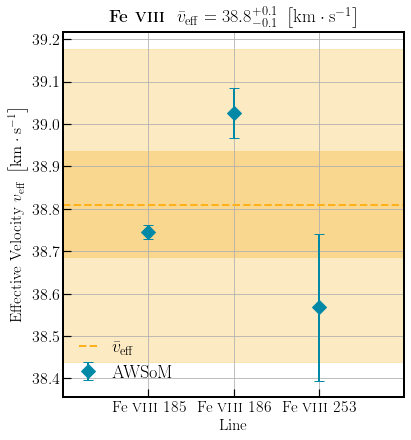

In [28]:
plot_awsom_width(df_eis,"Fe","viii")

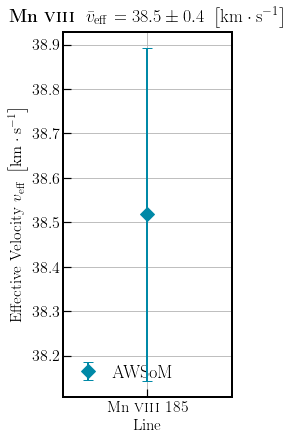

In [29]:
plot_awsom_width(df_eis,"Mn","viii","b")

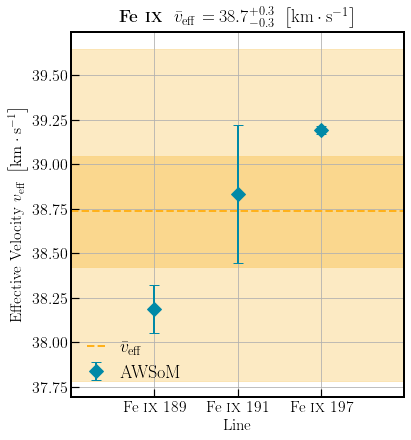

In [31]:
plot_awsom_width(df_eis,"Fe","ix")

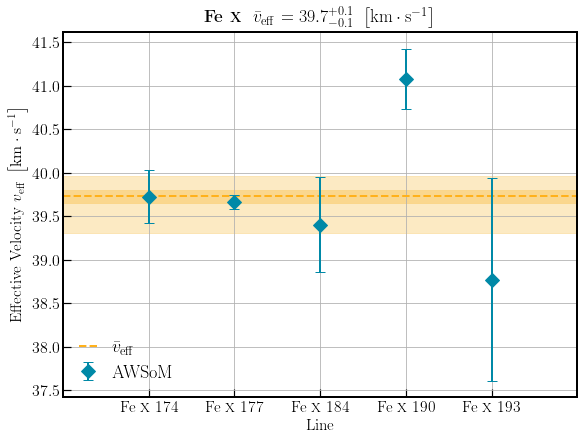

In [32]:
plot_awsom_width(df_eis,"Fe","x")

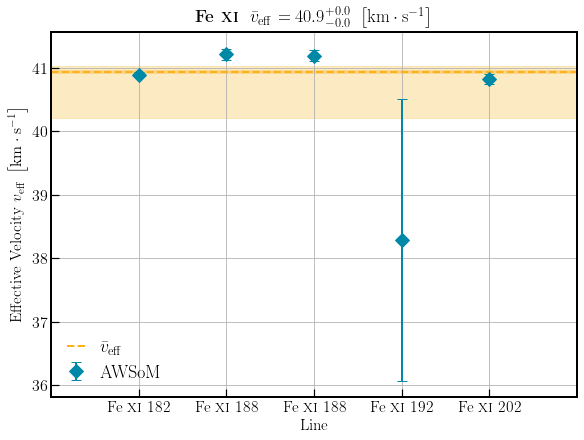

In [33]:
plot_awsom_width(df_eis,"Fe","xi")

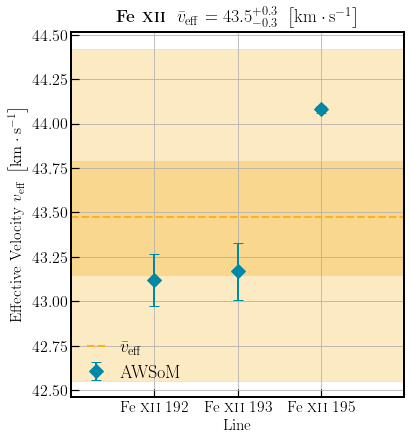

In [34]:
plot_awsom_width(df_eis,"Fe","xii")

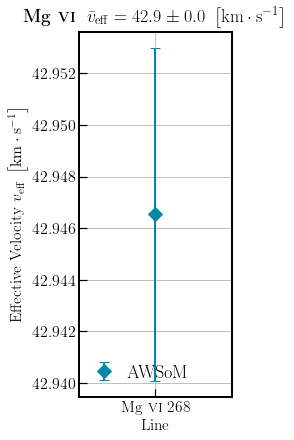

In [35]:
plot_awsom_width(df_eis,"Mg","vi",["b"])

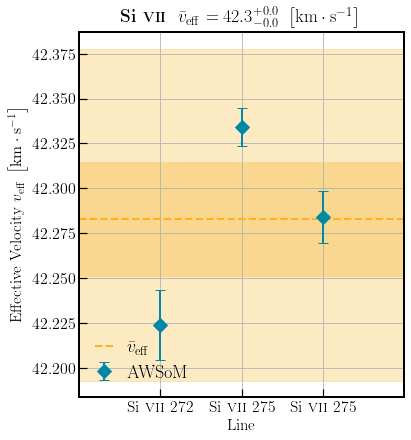

In [36]:
plot_awsom_width(df_eis,"Si","vii")

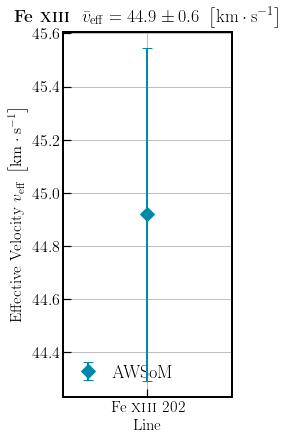

In [37]:
plot_awsom_width(df_eis,"Fe","xiii")

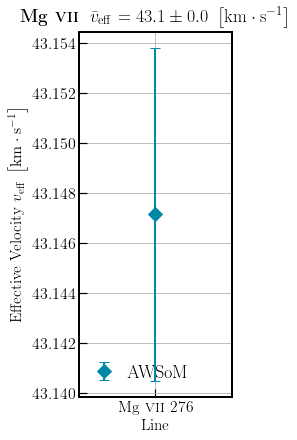

In [38]:
plot_awsom_width(df_eis,"Mg","vii")

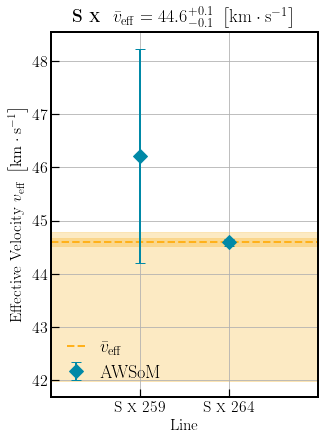

In [39]:
plot_awsom_width(df_eis,"S","x")

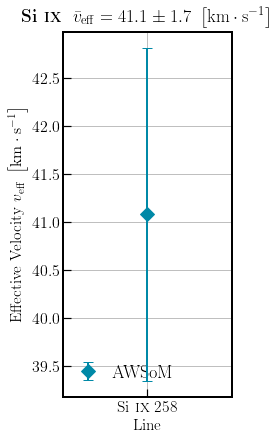

In [40]:
plot_awsom_width(df_eis,"Si","ix","b")

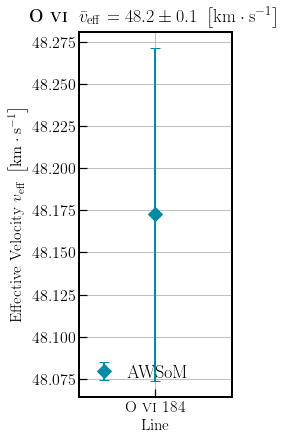

In [41]:
plot_awsom_width(df_eis,"O","vi")

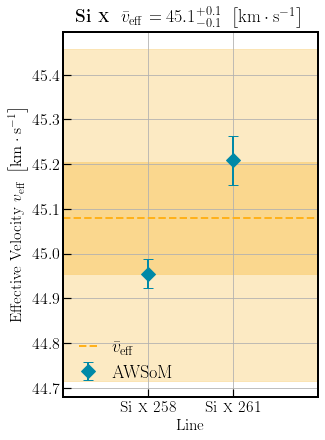

In [42]:
plot_awsom_width(df_eis,"Si","x")

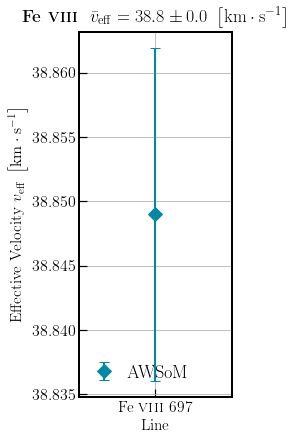

In [45]:
plot_awsom_width(df_sumer,"Fe","viii",inst="SUMER")

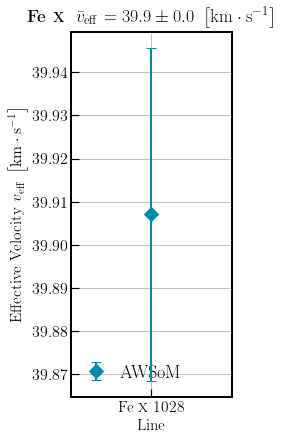

In [46]:
plot_awsom_width(df_sumer,"Fe","x",inst="SUMER")

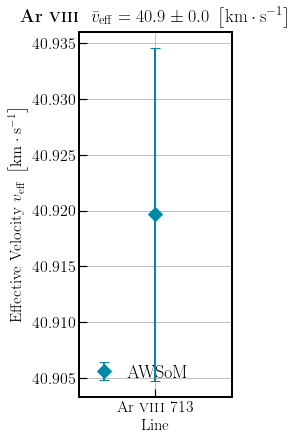

In [47]:
plot_awsom_width(df_sumer,"Ar","viii",inst="SUMER")

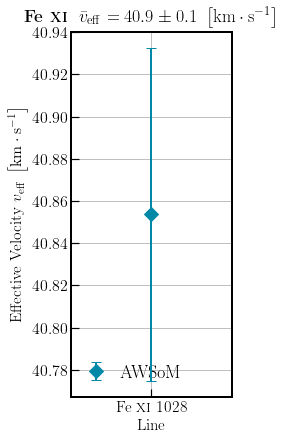

In [49]:
plot_awsom_width(df_sumer,"Fe","xi",inst="SUMER")

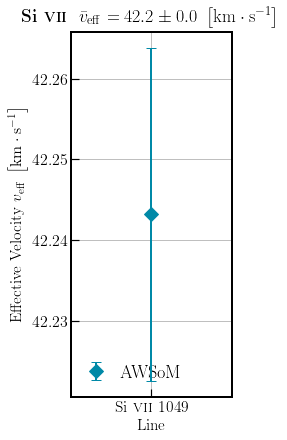

In [48]:
plot_awsom_width(df_sumer,"Si","vii",inst="SUMER")

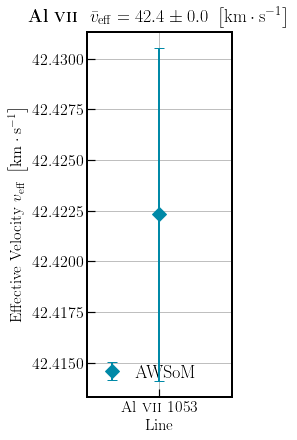

In [50]:
plot_awsom_width(df_sumer,"Al","vii",inst="SUMER")

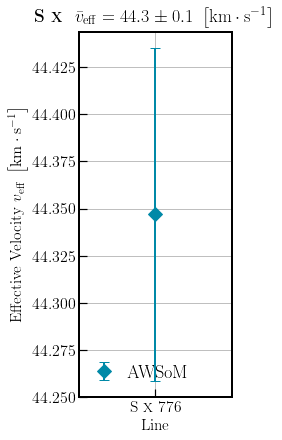

In [51]:
plot_awsom_width(df_sumer,"S","x",inst="SUMER")

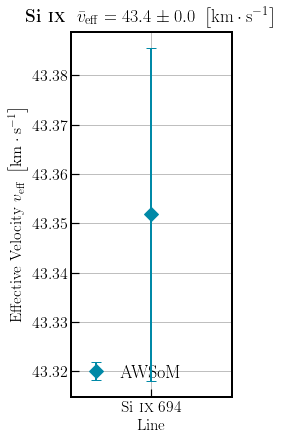

In [52]:
plot_awsom_width(df_sumer,"Si","ix",inst="SUMER")

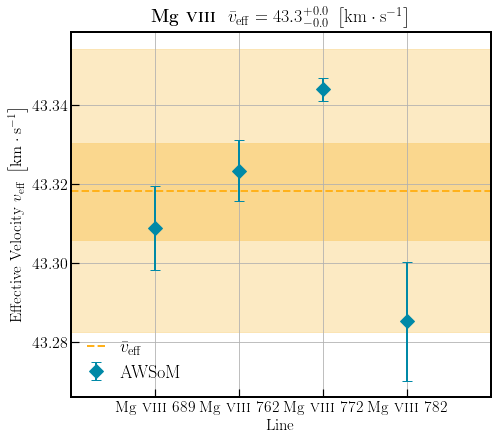

In [53]:
plot_awsom_width(df_sumer,"Mg","viii",inst="SUMER")

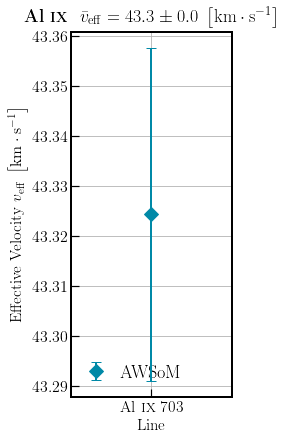

In [62]:
plot_awsom_width(df_sumer,"Al","ix","b",inst="SUMER")

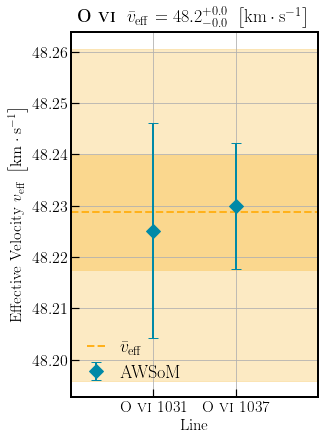

In [55]:
plot_awsom_width(df_sumer,"O","vi",inst="SUMER")

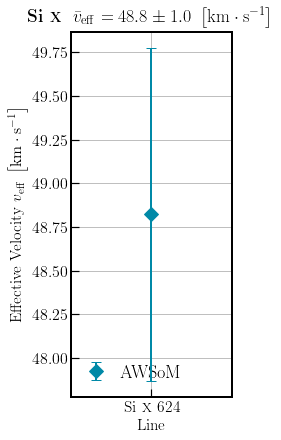

In [61]:
plot_awsom_width(df_sumer,"Si","x","b",inst="SUMER")

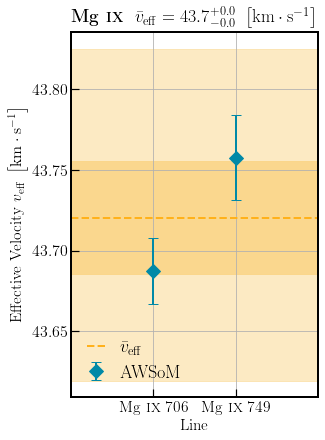

In [57]:
plot_awsom_width(df_sumer,"Mg","ix",inst="SUMER")

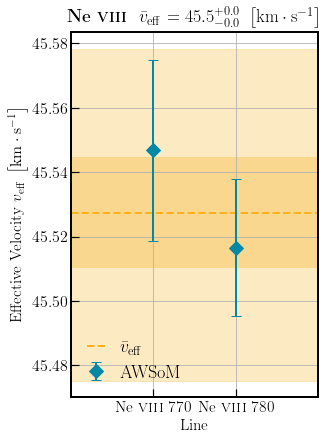

In [58]:
plot_awsom_width(df_sumer,"Ne","viii",inst="SUMER")

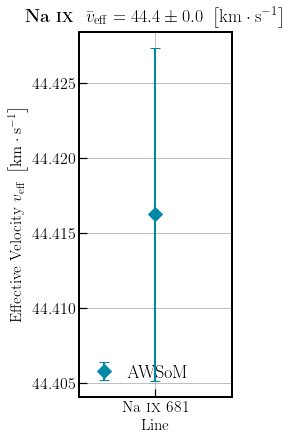

In [59]:
plot_awsom_width(df_sumer,"Na","ix",inst="SUMER")

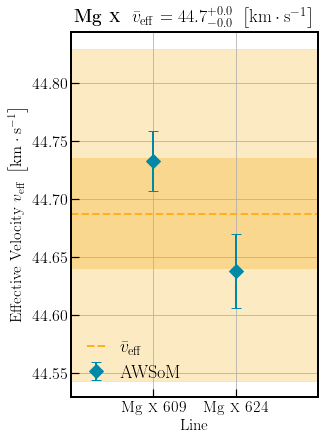

In [60]:
plot_awsom_width(df_sumer,"Mg","x",inst="SUMER")